In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/thousand-ml-jobs-in-usa/1000_ml_jobs_us.csv


In [2]:
df = pd.read_csv('/kaggle/input/thousand-ml-jobs-in-usa/1000_ml_jobs_us.csv')

In [3]:
df.head()

,Unnamed: 0,job_posted_date,company_address_locality,company_address_region,company_name,company_website,company_description,job_description_text,seniority_level,job_title
0,0,2024-10-31,Indianapolis,Indiana,Upper Hand,https://upperhand.com,Upper Hand is the leading provider of full-sui...,OverviewUpper Hand is embarking on an exciting...,Internship,Internship - Machine Learning Engineer & Data ...
1,1,2025-03-14,San Francisco,California,Ikigai,https://www.ikigailabs.io,"Built upon years of MIT research, Ikigai is a ...",Company DescriptionThe Ikigai platform unlocks...,Mid-Senior level,Machine Learning Engineer
2,2,2025-04-09,San Jose,CA,Adobe,http://www.adobe.com,Adobe is the global leader in digital media an...,Our CompanyChanging the world through digital ...,Entry level,Machine Learning Engineer
3,3,2025-03-22,Mountain View,California,Waymo,https://waymo.com/careers/,On the journey to be the world's most trusted ...,Waymo is an autonomous driving technology comp...,Entry level,"Machine Learning Engineer, Training"
4,4,2025-03-28,Boston,Massachusetts,HMH,http://www.hmhco.com,We are an adaptive learning company that empow...,Job Title: Machine Learning EngineerLocation: ...,Mid-Senior level,Machine Learning Engineer


In [4]:
df.info

<bound method DataFrame.info of      Unnamed: 0 job_posted_date company_address_locality  \
0             0      2024-10-31             Indianapolis   
1             1      2025-03-14            San Francisco   
2             2      2025-04-09                 San Jose   
3             3      2025-03-22            Mountain View   
4             4      2025-03-28                   Boston   
..          ...             ...                      ...   
992         992      2025-04-03               Menlo Park   
993         993      2025-04-01                  Houston   
994         994      2025-04-02                 New York   
995         995      2025-04-01            Mountain View   
996         996      2025-02-03                Watertown   

    company_address_region             company_name  \
0                  Indiana               Upper Hand   
1               California                   Ikigai   
2                       CA                    Adobe   
3               California 

In [5]:
df.columns

Index(['Unnamed: 0', 'job_posted_date', 'company_address_locality',
       'company_address_region', 'company_name', 'company_website',
       'company_description', 'job_description_text', 'seniority_level',
       'job_title'],
      dtype='object')

In [6]:
df.tail

<bound method NDFrame.tail of      Unnamed: 0 job_posted_date company_address_locality  \
0             0      2024-10-31             Indianapolis   
1             1      2025-03-14            San Francisco   
2             2      2025-04-09                 San Jose   
3             3      2025-03-22            Mountain View   
4             4      2025-03-28                   Boston   
..          ...             ...                      ...   
992         992      2025-04-03               Menlo Park   
993         993      2025-04-01                  Houston   
994         994      2025-04-02                 New York   
995         995      2025-04-01            Mountain View   
996         996      2025-02-03                Watertown   

    company_address_region             company_name  \
0                  Indiana               Upper Hand   
1               California                   Ikigai   
2                       CA                    Adobe   
3               California   

In [7]:
df.shape

(997, 10)

In [8]:
df.describe() 

,Unnamed: 0
count,997.000000
mean,498.000000
std,287.953411
min,0.000000
25%,249.000000
50%,498.000000
75%,747.000000
max,996.000000


In [9]:
df.describe(include='all')


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Unnamed: 0,job_posted_date,company_address_locality,company_address_region,company_name,company_website,company_description,job_description_text,seniority_level,job_title
count,997.000000,997,950,884,997,983,985,996,988,997
unique,NaN,116,178,87,488,478,480,795,7,450
top,NaN,2025-04-09,San Francisco,California,TikTok,https://www.tiktok.com/about?lang=en,TikTok is the world's leading destination for ...,Meta is embarking on the most transformative c...,Mid-Senior level,Machine Learning Engineer
freq,NaN,87,148,308,88,88,88,12,371,243
mean,498.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,287.953411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,249.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,498.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,747.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.describe(include=[object])  # Μόνο κατηγορικά/κειμενικά πεδία
df.describe(include=[float, int])  # Μόνο αριθμητικά
df.describe(exclude=[object])  # Ό,τι δεν είναι κείμενο

,Unnamed: 0
count,997.000000
mean,498.000000
std,287.953411
min,0.000000
25%,249.000000
50%,498.000000
75%,747.000000
max,996.000000


In [11]:
df['job_title'].value_counts()
df['company_name'].value_counts()


company_name
TikTok                88
Meta                  39
Snap Inc.             18
Adobe                 18
Splunk                18
                      ..
Strativ Group          1
webAI                  1
Hightouch              1
SIBLING                1
Tutor Intelligence     1
Name: count, Length: 488, dtype: int64

In [12]:
df.sample(5)

,Unnamed: 0,job_posted_date,company_address_locality,company_address_region,company_name,company_website,company_description,job_description_text,seniority_level,job_title
916,916,2025-04-04,Redwood City,CA,GoFundMe,https://gfme.co/homepage,There are a billion good intentions tucked ins...,Want to help us help others? We’re hiring!GoFu...,Mid-Senior level,Senior Machine Learning Engineer
234,234,2025-04-09,Sunnyvale,CA,Juniper Networks,http://www.juniper.net,Juniper Networks is leading the revolution in ...,"At Juniper, we believe the network is the sing...",Mid-Senior level,Data Science Intern/ AI/ML Engineer Intern - S...
399,399,2025-03-26,Los Angeles,California,TikTok,https://www.tiktok.com/about?lang=en,TikTok is the world's leading destination for ...,ResponsibilitiesTikTok is the leading destinat...,Internship,Machine Learning Engineer Graduate Data-Search...
843,843,2025-04-08,New York,New York,EDO,http://www.edo.com,"EDO, Inc. is the TV outcomes company — a leadi...",Who We AreEDO is the TV outcomes company. Our ...,Mid-Senior level,Machine Learning Engineer
769,769,2025-04-09,Guangzhou,Guangdong,XPENG,https://www.xpeng.com/,"XPENG is a leading tech company that designs, ...",XPENG is a leading smart technology company at...,Entry level,"Machine Learning Engineer, Robotics"


In [13]:
df.isnull().sum()              # Πόσα NaN έχει κάθε στήλη



Unnamed: 0                    0
job_posted_date               0
company_address_locality     47
company_address_region      113
company_name                  0
company_website              14
company_description          12
job_description_text          1
seniority_level               9
job_title                     0
dtype: int64

In [14]:
df.dropna()                    # Αφαίρεση γραμμών με NaN
df.fillna('Άγνωστο')           # Συμπλήρωση κενών με λέξη

,Unnamed: 0,job_posted_date,company_address_locality,company_address_region,company_name,company_website,company_description,job_description_text,seniority_level,job_title
0,0,2024-10-31,Indianapolis,Indiana,Upper Hand,https://upperhand.com,Upper Hand is the leading provider of full-sui...,OverviewUpper Hand is embarking on an exciting...,Internship,Internship - Machine Learning Engineer & Data ...
1,1,2025-03-14,San Francisco,California,Ikigai,https://www.ikigailabs.io,"Built upon years of MIT research, Ikigai is a ...",Company DescriptionThe Ikigai platform unlocks...,Mid-Senior level,Machine Learning Engineer
2,2,2025-04-09,San Jose,CA,Adobe,http://www.adobe.com,Adobe is the global leader in digital media an...,Our CompanyChanging the world through digital ...,Entry level,Machine Learning Engineer
3,3,2025-03-22,Mountain View,California,Waymo,https://waymo.com/careers/,On the journey to be the world's most trusted ...,Waymo is an autonomous driving technology comp...,Entry level,"Machine Learning Engineer, Training"
4,4,2025-03-28,Boston,Massachusetts,HMH,http://www.hmhco.com,We are an adaptive learning company that empow...,Job Title: Machine Learning EngineerLocation: ...,Mid-Senior level,Machine Learning Engineer
...,...,...,...,...,...,...,...,...,...,...
992,992,2025-04-03,Menlo Park,CA,Meta,https://www.metacareers.com/,Meta's mission is to build the future of human...,Reality Labs at Meta is building products that...,Not Applicable,"Software Engineer, Computer Vision - Reality Labs"
993,993,2025-04-01,Houston,Texas,The Lab Consulting,http://www.thelabconsulting.com,The Lab is a management consulting firm that h...,"We are a mid-sized Management Consulting, Auto...",Mid-Senior level,Data Scientist
994,994,2025-04-02,New York,NY,FanDuel,https://www.fanduel.careers/,FanDuel Group is an innovative sports-tech ent...,About FanduelFanDuel Group is the premier mobi...,Director,Software Engineer - React
995,995,2025-04-01,Mountain View,CA,"X, The Moonshot Factory",https://x.company,We create breakthrough technologies to help so...,"About The TeamTapestry, is X’s moonshot for th...",Mid-Senior level,"Machine Learning Engineer, Tapestry"


In [15]:
df['job_title'].value_counts().head(10)


job_title
Machine Learning Engineer                                          243
Data Scientist                                                      53
Software Engineer, Machine Learning                                 30
Senior Machine Learning Engineer                                    22
Software Engineer, Machine Learning (Multiple Levels) - Slack        9
Machine Learning Engineer, AI (FULLY REMOTE, USA)                    9
Machine Learning Engineer, AI Platform (FULLY REMOTE, USA ONLY)      8
Machine Learning Engineer II                                         8
Artificial Intelligence / Data Scientist Intern (HR)                 8
Software Engineer                                                    7
Name: count, dtype: int64

In [16]:
df['company_address_locality'].value_counts().head(10)


company_address_locality
San Francisco    148
Los Angeles       93
New York          54
Menlo Park        43
San Jose          38
Seattle           37
Mountain View     34
London            25
Boston            21
Santa Monica      20
Name: count, dtype: int64

In [17]:
df['seniority_level'].value_counts()


seniority_level
Mid-Senior level    371
Entry level         300
Not Applicable      209
Internship           70
Associate            32
Director              5
Executive             1
Name: count, dtype: int64

In [18]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_posted_date'].dt.month.value_counts().sort_index()


job_posted_date
1      28
2      34
3     426
4     433
5       1
6       7
7       3
8       6
9       4
10      8
11     15
12     32
Name: count, dtype: int64

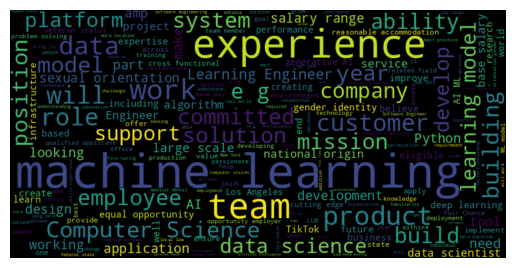

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(df['job_description_text'].dropna().values)
wordcloud = WordCloud(width=800, height=400).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
df.drop(columns=['Unnamed: 0'], inplace=True)


In [22]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])


In [23]:
df['seniority_level'].fillna('Unknown', inplace=True)
df['company_address_locality'].fillna('Unknown', inplace=True)


/tmp/ipykernel_31/3364023961.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['seniority_level'].fillna('Unknown', inplace=True)
/tmp/ipykernel_31/3364023961.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

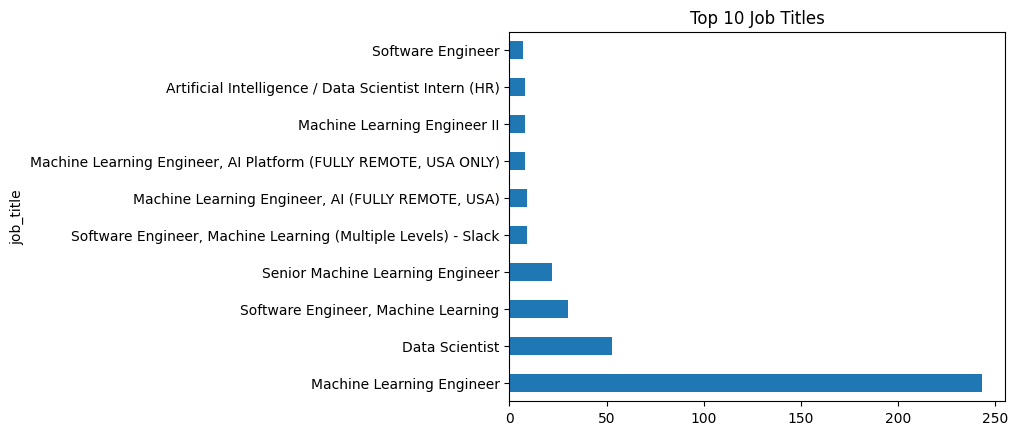

In [24]:
df['job_title'].value_counts().head(10).plot(kind='barh')
plt.title("Top 10 Job Titles")
plt.show()


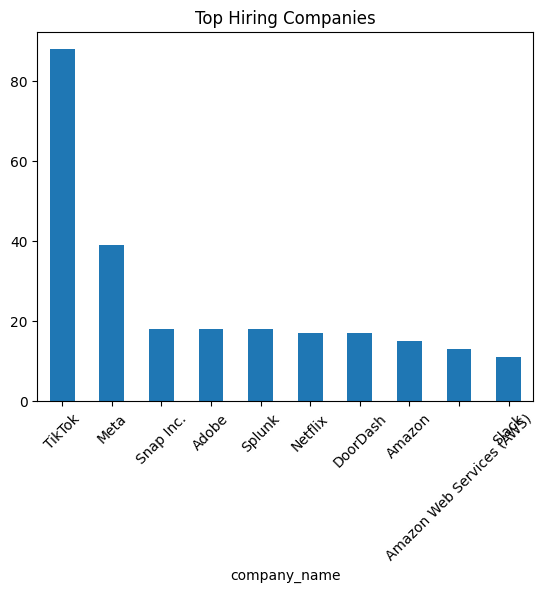

In [25]:
df['company_name'].value_counts().head(10).plot(kind='bar')
plt.title("Top Hiring Companies")
plt.xticks(rotation=45)
plt.show()


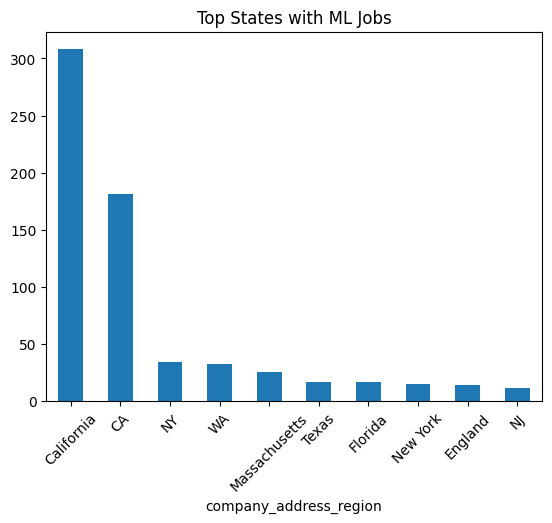

In [26]:
df['company_address_region'].value_counts().head(10).plot(kind='bar')
plt.title("Top States with ML Jobs")
plt.xticks(rotation=45)
plt.show()


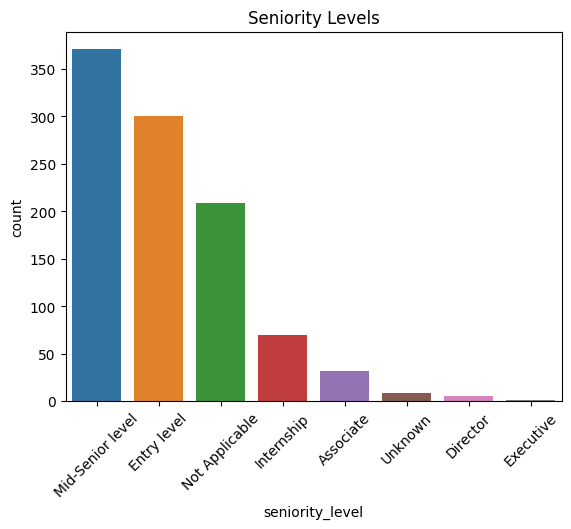

In [27]:
sns.countplot(data=df, x='seniority_level', order=df['seniority_level'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Seniority Levels")
plt.show()


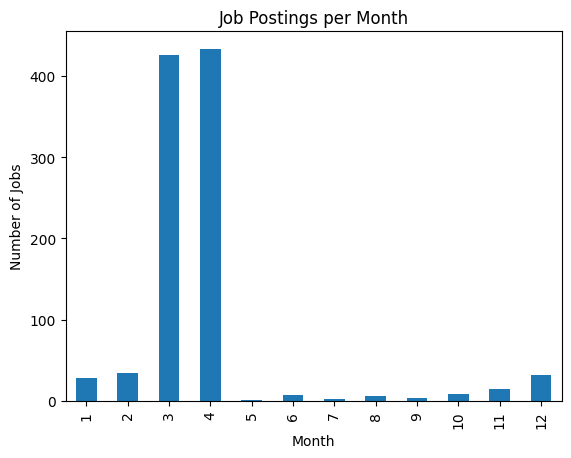

In [28]:
df['job_posted_date'].dt.month.value_counts().sort_index().plot(kind='bar')
plt.title("Job Postings per Month")
plt.xlabel("Month")
plt.ylabel("Number of Jobs")
plt.show()


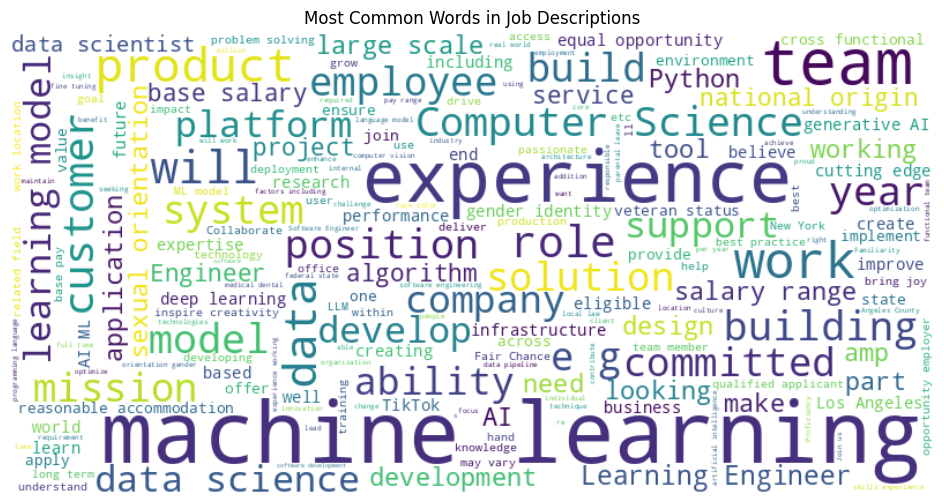

In [29]:
from wordcloud import WordCloud

text = " ".join(df['job_description_text'].dropna().values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Job Descriptions")
plt.show()


In [30]:
df = df[df['seniority_level'].notnull()]  # μόνο με labels
df = df[df['job_description_text'].notnull()]

X = df['job_description_text']
y = df['seniority_level']


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = tfidf.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


                  precision    recall  f1-score   support

       Associate       0.50      0.12      0.20         8
        Director       0.00      0.00      0.00         3
     Entry level       0.55      0.53      0.54        55
      Internship       1.00      0.80      0.89        15
Mid-Senior level       0.57      0.78      0.66        79
  Not Applicable       0.96      0.59      0.73        39
         Unknown       0.00      0.00      0.00         1

        accuracy                           0.64       200
       macro avg       0.51      0.40      0.43       200
    weighted avg       0.66      0.64      0.63       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


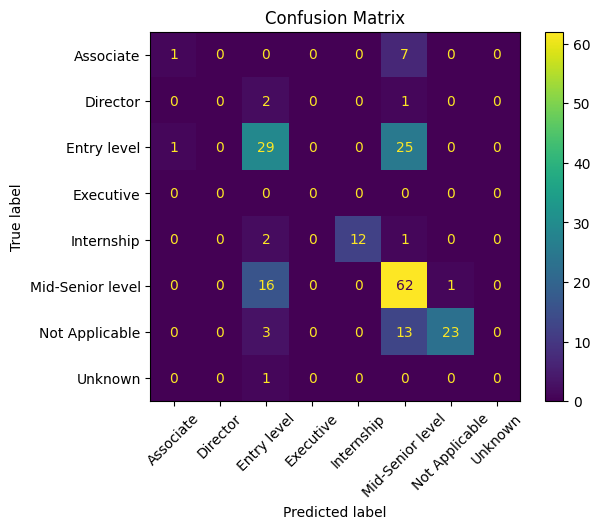

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()


In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


                  precision    recall  f1-score   support

       Associate       0.50      0.12      0.20         8
        Director       0.00      0.00      0.00         3
     Entry level       0.55      0.53      0.54        55
      Internship       1.00      0.80      0.89        15
Mid-Senior level       0.57      0.78      0.66        79
  Not Applicable       0.96      0.59      0.73        39
         Unknown       0.00      0.00      0.00         1

        accuracy                           0.64       200
       macro avg       0.51      0.40      0.43       200
    weighted avg       0.66      0.64      0.63       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid, cv=3, scoring='f1_weighted')
grid_search.fit(X_train, y_train)
print("Best params:", grid_search.best_params_)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Best params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


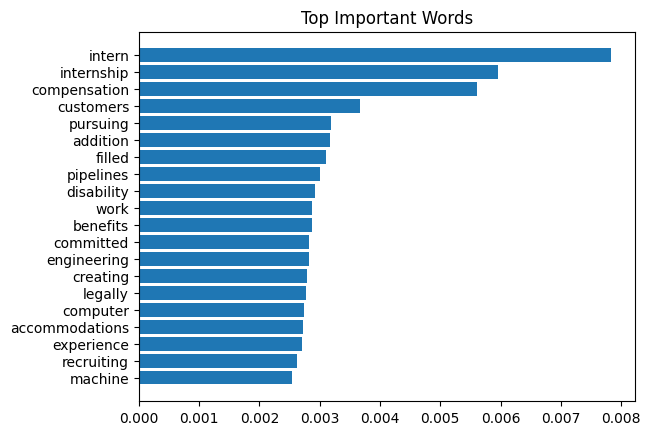

In [36]:
import numpy as np

# Πάρ’το από το best model
feature_names = tfidf.get_feature_names_out()
importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)[-20:]  # Top 20

plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.title('Top Important Words')
plt.show()


In [37]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_tfidf, y, cv=5, scoring='f1_weighted')
print("CV F1 Scores:", scores)
print("Mean:", np.mean(scores))


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


CV F1 Scores: [0.51232429 0.55201417 0.49813036 0.65504781 0.61558389]
Mean: 0.566620104910772


In [38]:
new_desc = ["We are looking for a machine learning engineer with 2+ years of experience in Python and AWS."]
new_vec = tfidf.transform(new_desc)
print(model.predict(new_vec))


['Mid-Senior level']


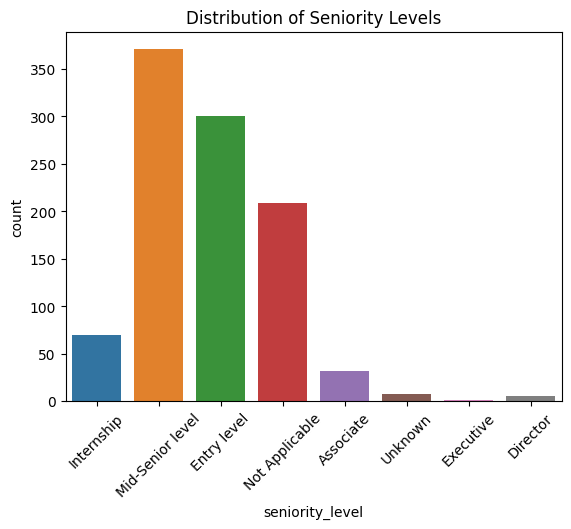

In [39]:
sns.countplot(x=y)
plt.title("Distribution of Seniority Levels")
plt.xticks(rotation=45)
plt.show()


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Αφαίρεση NaN και επιλογή των χαρακτηριστικών
df = df[df['seniority_level'].notnull()]  
df = df[df['job_description_text'].notnull()]

X = df['job_description_text']
y = df['seniority_level']

# TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = tfidf.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


In [41]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)


In [42]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)


In [43]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)


In [44]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)


Model: Random Forest
Accuracy: 0.6350
Classification Report:
                  precision    recall  f1-score   support

       Associate       0.50      0.12      0.20         8
        Director       0.00      0.00      0.00         3
     Entry level       0.55      0.53      0.54        55
      Internship       1.00      0.80      0.89        15
Mid-Senior level       0.57      0.78      0.66        79
  Not Applicable       0.96      0.59      0.73        39
         Unknown       0.00      0.00      0.00         1

        accuracy                           0.64       200
       macro avg       0.51      0.40      0.43       200
    weighted avg       0.66      0.64      0.63       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


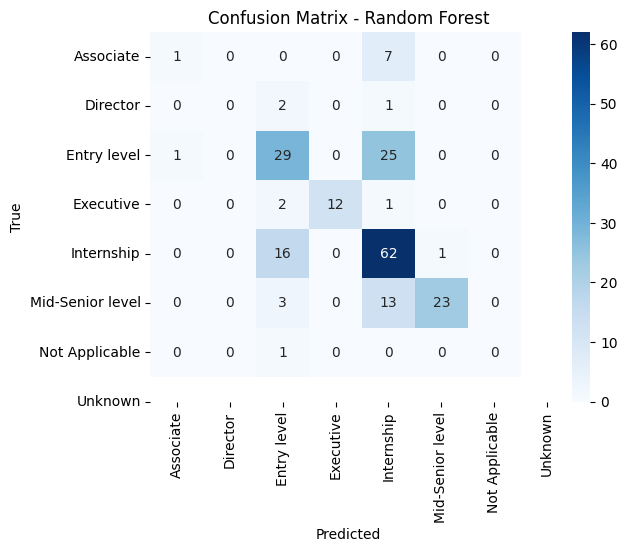

Model: Logistic Regression
Accuracy: 0.6100
Classification Report:
                  precision    recall  f1-score   support

       Associate       1.00      0.12      0.22         8
        Director       0.00      0.00      0.00         3
     Entry level       0.52      0.49      0.50        55
      Internship       1.00      0.47      0.64        15
Mid-Senior level       0.54      0.78      0.64        79
  Not Applicable       1.00      0.64      0.78        39
         Unknown       0.00      0.00      0.00         1

        accuracy                           0.61       200
       macro avg       0.58      0.36      0.40       200
    weighted avg       0.67      0.61      0.60       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


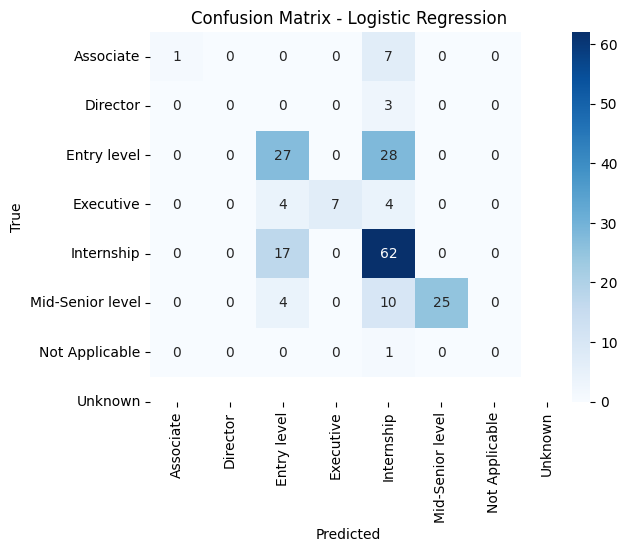

Model: Naive Bayes
Accuracy: 0.5400
Classification Report:
                  precision    recall  f1-score   support

       Associate       0.00      0.00      0.00         8
        Director       0.00      0.00      0.00         3
     Entry level       0.48      0.36      0.41        55
      Internship       0.00      0.00      0.00        15
Mid-Senior level       0.49      0.84      0.61        79
  Not Applicable       1.00      0.56      0.72        39
         Unknown       0.00      0.00      0.00         1

        accuracy                           0.54       200
       macro avg       0.28      0.25      0.25       200
    weighted avg       0.52      0.54      0.50       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


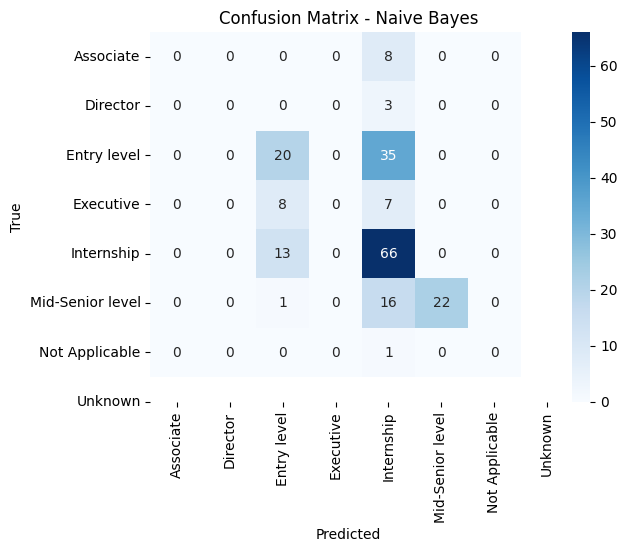

Model: SVM
Accuracy: 0.6250
Classification Report:
                  precision    recall  f1-score   support

       Associate       1.00      0.12      0.22         8
        Director       0.00      0.00      0.00         3
     Entry level       0.54      0.51      0.52        55
      Internship       1.00      0.53      0.70        15
Mid-Senior level       0.55      0.80      0.65        79
  Not Applicable       1.00      0.64      0.78        39
         Unknown       0.00      0.00      0.00         1

        accuracy                           0.62       200
       macro avg       0.58      0.37      0.41       200
    weighted avg       0.68      0.62      0.62       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


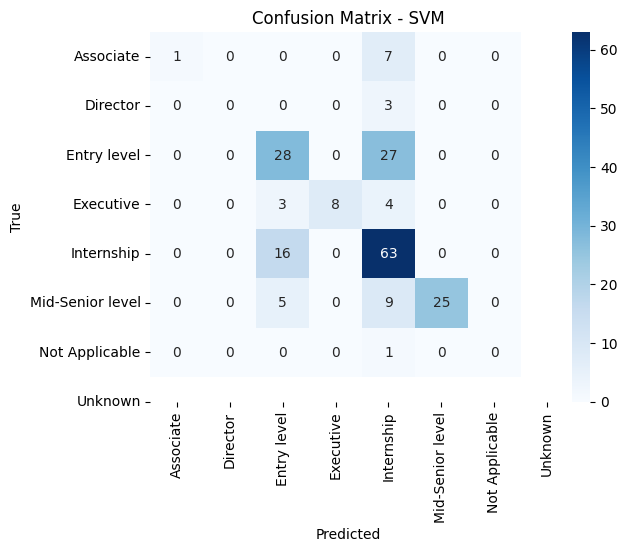

In [45]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate each model
models = {
    "Random Forest": rf_model,
    "Logistic Regression": lr_model,
    "Naive Bayes": nb_model,
    "SVM": svm_model
}

for model_name, model in models.items():
    print(f"Model: {model_name}")
    y_pred = model.predict(X_test)
    
    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    
    # Precision, Recall, F1-score
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()


In [46]:
# Store results in a DataFrame
results = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall"])

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    
    # Create a new DataFrame with the results
    model_results = pd.DataFrame({
        "Model": [model_name], 
        "Accuracy": [acc], 
        "Precision": [precision], 
        "Recall": [recall]
    })
    
    # Concatenate the results with the main DataFrame
    results = pd.concat([results, model_results], ignore_index=True)

# Sort results
results.sort_values(by="Accuracy", ascending=False, inplace=True)
print(results)


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/tmp/ipykernel_31/4261458727.py:21: FutureWarning: The behavior 

                 Model  Accuracy  Precision  Recall
0        Random Forest     0.635   0.657026   0.635
3                  SVM     0.625   0.676366   0.625
1  Logistic Regression     0.610   0.665745   0.610
2          Naive Bayes     0.540   0.517644   0.540


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


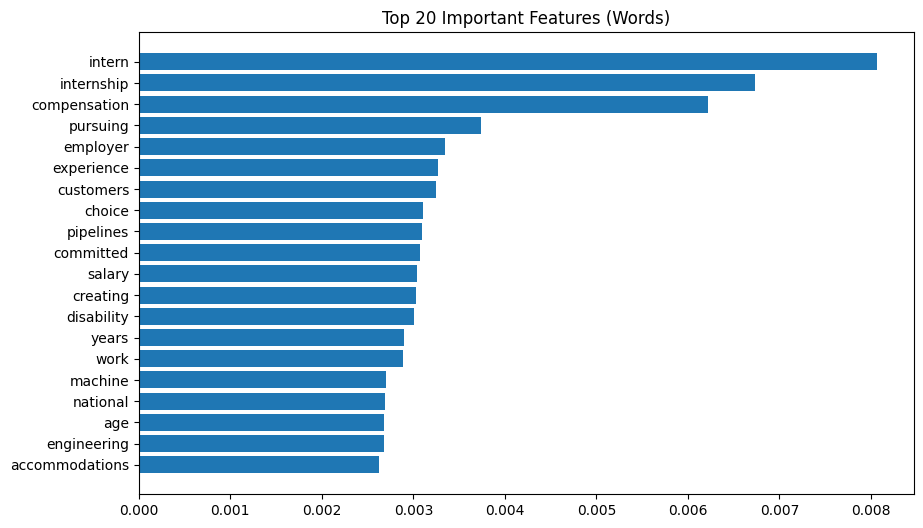

In [47]:
import numpy as np

# Random Forest Feature Importance
feature_names = tfidf.get_feature_names_out()
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-20:]  # Top 20 features

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.title('Top 20 Important Features (Words)')
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


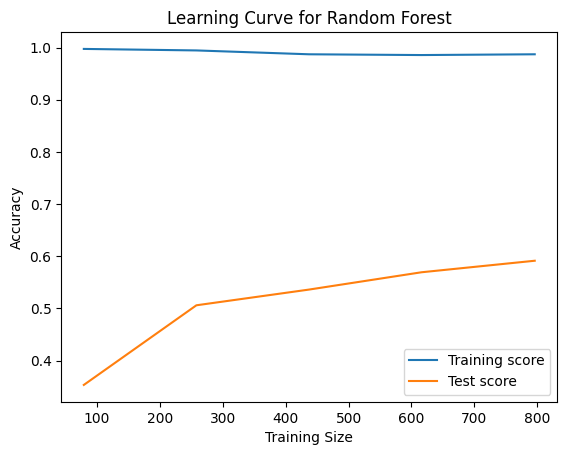

In [48]:
from sklearn.model_selection import learning_curve

# Random Forest Learning Curve
train_sizes, train_scores, test_scores = learning_curve(rf_model, X_tfidf, y, cv=5, scoring='accuracy')

plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Test score")
plt.title('Learning Curve for Random Forest')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


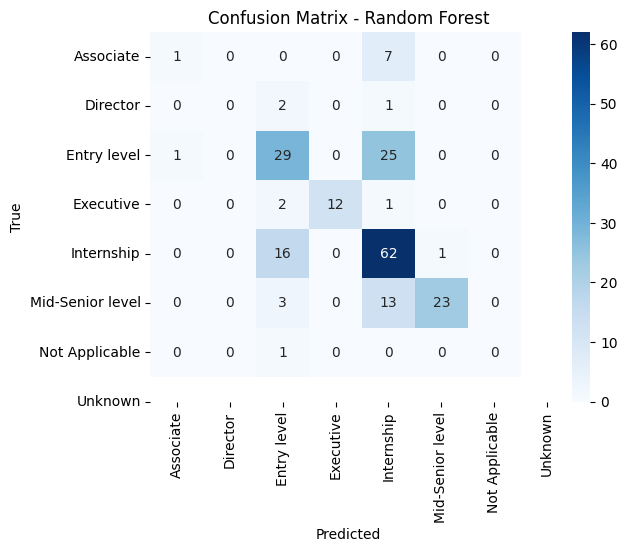

In [49]:
# Από το confusion matrix μπορούμε να δούμε ποιες κατηγορίες μπλέκονται περισσότερο
cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class f

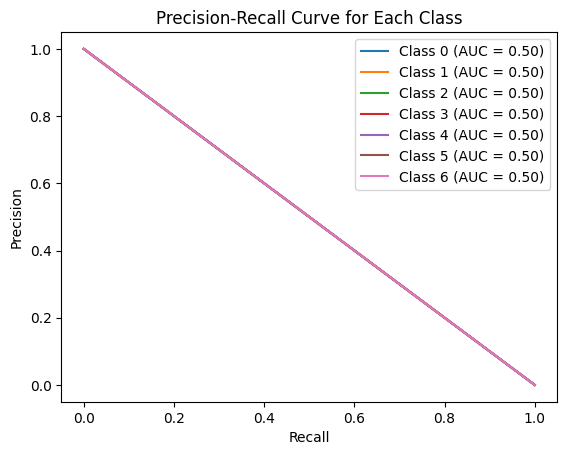

In [50]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

# Για κάθε κατηγορία κάνουμε το Precision-Recall
n_classes = len(set(y_test))  # Πόσες κατηγορίες υπάρχουν
for i in range(n_classes):
    precision, recall, thresholds = precision_recall_curve(y_test == i, rf_model.predict_proba(X_test)[:, i])
    pr_auc = auc(recall, precision)
    
    plt.plot(recall, precision, label=f'Class {i} (AUC = {pr_auc:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Each Class')
plt.legend(loc='best')
plt.show()



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


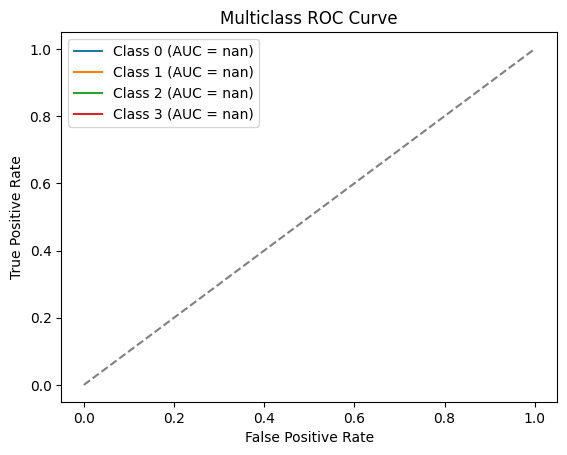

In [51]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels
y_bin = label_binarize(y_test, classes=[0, 1, 2, 3])  # Αντικατάστησε με τις κατηγορίες σου
n_classes = y_bin.shape[1]

# Υπολογισμός ROC για κάθε κατηγορία
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], rf_model.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve for each class
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='best')
plt.show()


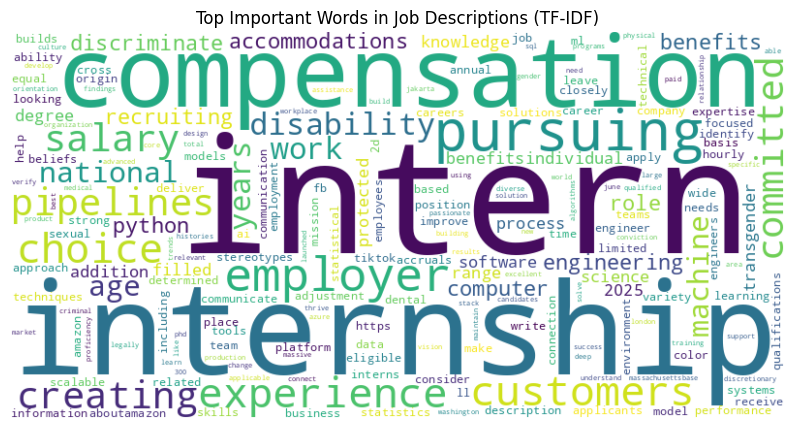

In [52]:
from wordcloud import WordCloud

# Δημιουργία WordCloud από τις πιο σημαντικές λέξεις
feature_names = tfidf.get_feature_names_out()
tfidf_scores = np.asarray(rf_model.feature_importances_)

wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(dict(zip(feature_names, tfidf_scores)))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Top Important Words in Job Descriptions (TF-IDF)")
plt.show()


In [53]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Hyperparameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 100}


In [54]:
from sklearn.ensemble import VotingClassifier

# Voting Classifier combining Random Forest, Logistic Regression, Naive Bayes
voting_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('lr', lr_model),
    ('nb', nb_model)
], voting='hard')

voting_model.fit(X_train, y_train)
voting_pred = voting_model.predict(X_test)
print("Voting Classifier Accuracy:", accuracy_score(y_test, voting_pred))


Voting Classifier Accuracy: 0.61


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


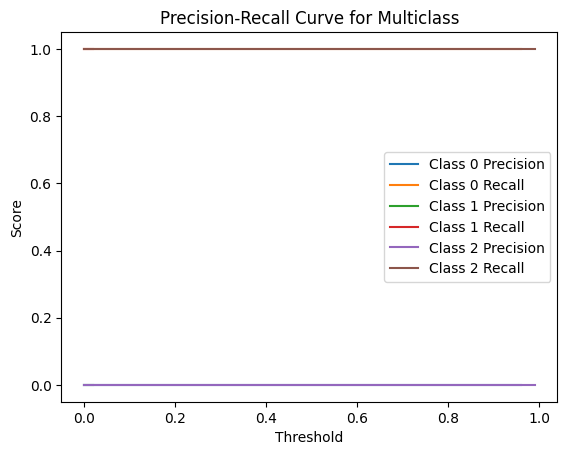

In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the true labels for multiclass classification
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Adjust this to your actual class labels

# Get predicted probabilities for each class
y_pred_proba = rf_model.predict_proba(X_test)

# Plot precision-recall curve for each class
for i in range(y_test_bin.shape[1]):
    precision, recall, thresholds = precision_recall_curve(y_test_bin[:, i], y_pred_proba[:, i])
    plt.plot(thresholds, precision[:-1], label=f'Class {i} Precision')
    plt.plot(thresholds, recall[:-1], label=f'Class {i} Recall')

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Curve for Multiclass')
plt.legend()
plt.show()


In [56]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

base_learners = [
    ('rf', RandomForestClassifier()),
    ('lr', LogisticRegression())
]
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())
stacking_model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:1116: RuntimeWarning: Number of classes in training fold (7) does not match total number of classes (8). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:1116: RuntimeWarning: Number of classes in training fold (7) does not match total number of classes (8). Results may not be appropriate for your use case. To fix this, use a cross-validation technique re

StackingClassifier(estimators=[('rf', RandomForestClassifier()),
                               ('lr', LogisticRegression())],
                   final_estimator=LogisticRegression())

In [58]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

# Use StratifiedKFold
skf = StratifiedKFold(n_splits=5)

for train_index, val_index in skf.split(np.arange(X_train.shape[0]), y_train):
    # Access the train and validation folds using numpy-style indexing
    X_train_fold = X_train[train_index].toarray()  # Convert to dense array if needed
    X_val_fold = X_train[val_index].toarray()  # Convert to dense array if needed
    y_train_fold = y_train.iloc[train_index]  # y_train should be a pandas Series, which supports indexing
    y_val_fold = y_train.iloc[val_index]  


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [59]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.05)
outliers = iso_forest.fit_predict(X_train)


In [60]:
print(df.columns)


Index(['job_posted_date', 'company_address_locality', 'company_address_region',
       'company_name', 'company_website', 'company_description',
       'job_description_text', 'seniority_level', 'job_title'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


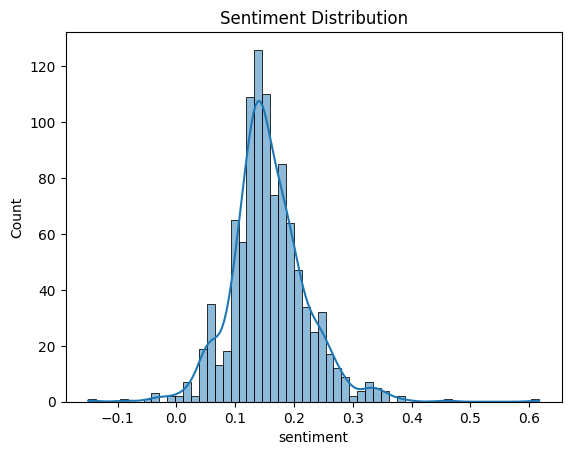

In [61]:
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt

# Εφαρμογή ανάλυσης συναισθήματος με TextBlob στην στήλη 'job_description_text'
df['sentiment'] = df['job_description_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Οπτικοποίηση κατανομής συναισθήματος
sns.histplot(df['sentiment'], kde=True)
plt.title('Sentiment Distribution')
plt.show()


In [62]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2, 2))  # Bi-grams
X = vectorizer.fit_transform(df['job_description_text'])


In [65]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

base_learners = [
    ('rf', RandomForestClassifier()),
    ('lr', LogisticRegression())
]
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())
stacking_model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:1116: RuntimeWarning: Number of classes in training fold (7) does not match total number of classes (8). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:1116: RuntimeWarning: Number of classes in training fold (7) does not match total number of classes (8). Results may not be appropriate for your use case. To fix this, use a cross-validation technique re

StackingClassifier(estimators=[('rf', RandomForestClassifier()),
                               ('lr', LogisticRegression())],
                   final_estimator=LogisticRegression())